In [2]:
# imports
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte
from skimage.io import imread,imsave
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk
from skimage.morphology import binary_dilation,binary_erosion
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import filters
import math
import helpers
import preprocessing
import extract_features
%matplotlib inline

In [3]:


# sy = filters.sobel_h(img)+0.0000000000000000000000000000000000001
# sx = filters.sobel_v(img)+0.0000000000000000000000000000000000001
# print(sy,sx)
# z = np.rad2deg(np.arctan(sy/sx))
# z = z.astype(int)
# hist = sk.exposure.histogram(z)
# arr = [] 
# for i in range(len(hist[0])):
#     arr.append((hist[0][i]/(img.shape[0]*img.shape[1]),hist[1][i]))
# #arr = np.sort(arr)
# arr.sort()
# #arr = np.flip(arr)
# arr = arr[::-1]
# #print(arr)
# for i in range(5):
#     print(z.shape)

# fd = sk.feature.hog(img, orientations=9, pixels_per_cell=(16, 16),cells_per_block=(3, 3),transform_sqrt=True,feature_vector=True)
# fd = np.reshape(fd,(int(fd.shape[0]/9),9))
# print(fd.shape)
#fd = np.reshape(fd,img.shape)
# for i in range(img.shape[0]):
#     for j in range(img.shape[1]):
#         if img[i][j] ==0:
#             print("fd ",fd[i][j])
# print(fd.shape)
# x = np.mean(fd,axis=0)
# print(x)
# hog = cv2.HOGDescriptor()
# c_img =  np.uint8(img)
# h = hog.compute(c_img)
# h = np.reshape(h,(int(h.shape[0]/9),9))
# print(h.shape)
# mean = np.mean(h,axis=0)
# var = np.var(h,axis=0)
# for i in range(9):
#     print("mean ",mean[i],"var ",var[i])



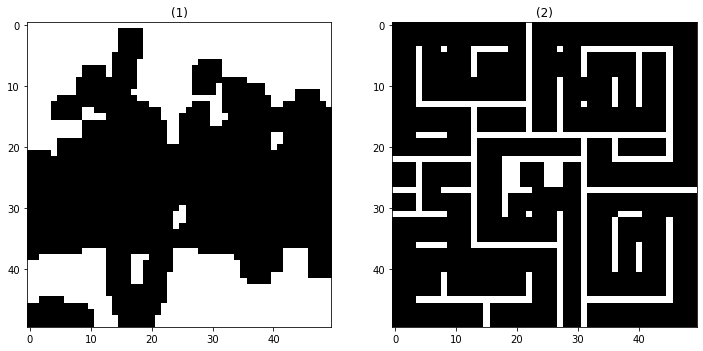

In [4]:
img1 = helpers.readImageGray("./ACDB/ACdata_base/1/0001.jpg")

img2 = helpers.readImageGray("./ACDB/ACdata_base/9/1496.jpg")


img1 = preprocessing.binarization(img1,helpers.isTextBlack(img1))
img2 = preprocessing.binarization(img2,helpers.isTextBlack(img2))
# helpers.show_images([(img1==False),img2])
# print((img1==False))
img1 = preprocessing.skeletonization(img1)
img2 = preprocessing.skeletonization(img2)
img1 = resize(img1, (50,50),
                       anti_aliasing=True)
img2 = resize(img2, (50,50),
                       anti_aliasing=True)
img1 = preprocessing.binarization(img1)
img2 = preprocessing.binarization(img2)
helpers.show_images([img1,img2])


[(35, 74), (61, 74), (65, 74), (99, 74), (107, 74), (115, 74), (135, 74), (162, 74), (175, 74), (185, 74), (197, 74), (212, 74), (222, 74), (240, 74), (280, 74), (297, 74), (314, 74), (324, 74), (348, 74), (356, 74), (371, 74), (389, 74), (398, 74), (411, 74), (432, 74), (446, 74), (462, 74), (481, 74), (491, 74), (499, 74), (505, 74), (526, 74), (541, 74), (554, 74), (561, 74), (571, 74), (591, 74), (608, 74), (624, 74), (634, 74), (658, 74)]


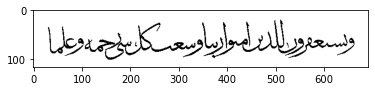

In [5]:
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte
from skimage.io import imread, imsave
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk
from skimage.morphology import binary_dilation, binary_erosion
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import filters
from skimage.segmentation import flood, flood_fill
from skimage.color import rgb2gray, gray2rgb
from skimage import measure
from skimage.feature import match_template
import math
import os
import helpers
import preprocessing
from scipy.signal import convolve2d
from scipy import ndimage
img1 = helpers.readImageGray("./ACDB/ACdata_base/1/0001.jpg")

_img_gray = helpers.readImageGray("./ACDB/ACdata_base/8/1307.jpg")

img = _img_gray.copy()
binary = preprocessing.binarization(img)
horizontal_hist = np.sum(binary, axis=1)
img_with_Diacritics = np.copy(binary)
img_with_Diacritics = img_with_Diacritics.astype(np.uint8)
basline = np.argmin(horizontal_hist)
seed = []

temp = img_with_Diacritics[basline, 0]
cp = gray2rgb(img_with_Diacritics)
for i in range(1, len(img_with_Diacritics[basline])):
        if temp == 1 and img_with_Diacritics[basline, i] == 0:
            seed.append((i, basline))
        temp = img_with_Diacritics[basline, i]
print(seed)
for i in seed:
        cv2.floodFill(img_with_Diacritics, None, i, 255)
        #flood_fill(image=img_with_Diacritics, seed_point=i, new_value=1)
image_without_diacritic = (binary-img_with_Diacritics)

# struct1 = ndimage.generate_binary_structure(2, 2)
# img_with_Diacritics = ndimage.binary_erosion(
#     img_with_Diacritics, structure=struct1).astype(img_with_Diacritics.dtype)
# img_with_Diacritics = ndimage.binary_dilation(
#     img_with_Diacritics, structure=struct1).astype(img_with_Diacritics.dtype)
# Template1 = imread("./1.png", as_gray=True)
# Template2 = imread("./2.png", as_gray=True)
# BW1 = preprocessing.binarization(Template1)
# BW2 = preprocessing.binarization(Template2)
# BW1 = BW1.astype(np.uint8)
# BW2 = BW2.astype(np.uint8)
# contours1 = measure.find_contours(BW1)
# contours2 = measure.find_contours(BW2)
# Temp1Copy = gray2rgb(BW1)
# Temp2Copy = gray2rgb(BW2)
# SC1 = sorted(contours1,  reverse=True)
# SC2 = sorted(contours2,  reverse=True)

# temp1 = SC1[0][1]
# temp2 = SC2[0][1]
# fig, ax = plt.subplots()
# for n, contour in enumerate(SC2):
#     ax.plot(SC2[n][:, 1], SC2[n][:, 0], linewidth=2)
# plt.show()
# hight1, width1 = Template1.shape
# hight2, width2 = Template2.shape
# contours3 = measure.find_contours(img_with_Diacritics)
# fig, ax = plt.subplots()
# for n, contour in enumerate(contours3):
#     ax.plot(contours3[n][:, 1], contours3[n][:, 0], linewidth=2)
# plt.show()
# #SC3 = sorted(contours3, reverse=True)
# img_with_Diacritics = gray2rgb(img_with_Diacritics)
# number_of_first_diacritic = 1
# number_of_second_diacritic = 1
# for c in contours3:
#     # Xmin = np.min(c[:, 0])
#     # Xmax = np.max(c[:, 0])
#     # Ymin = np.min(c[:, 1])
#     # Ymax = np.max(c[:, 1])
#     # cropted = img_with_Diacritics[int(Ymin):int(
#     #     Ymin+Ymax), int(Xmin):int(Xmin+Xmax)]
#     # plt.imshow(cropted)
#     # plt.show()
#     result1 = match_template(c, temp1)
#     result2 = match_template(c, temp2)
#     print(result1)
#     print(result2)
plt.imshow(image_without_diacritic*-1)


In [6]:
import pandas as pd

def readFromCSV(filename):
    file = open(filename, "r")
    features = []
    label = []
    for row in file:
        featrueSlice = slice(0, len(row)-3)
        features.append(row[featrueSlice])
        lab = row.replace(str(row[featrueSlice]), "")
        lab = lab.replace(",", "")
        label.append(lab)
    return features, label


features, label = readFromCSV("wor.csv")
features = np.array(features)
features = pd.DataFrame(features)

print(features)


                       0
0      26.97760750853303
1      40.01490828145596
2     30.839782929759682
3      33.77996308796918
4      28.79357015842532
...                  ...
1959                0.0,
1960                0.0,
1961                0.0,
1962                0.0,
1963                0.0,

[1964 rows x 1 columns]


In [18]:

def getHVSL(_img_gray):
    # bw = preprocessing.binarization(_img_gray)*255
    _, bw = cv2.threshold(_img_gray, 150, 255, cv2.THRESH_BINARY)
    edges = cv2.Canny(bw, 50,  150, apertureSize=3)
    horizontal = np.copy(edges)
    vertical = np.copy(edges)
    # Specify size on horizontal axis
    cols = horizontal.shape[1]
    horizontal_size = cols // 30
    horizontalStructure = cv2.getStructuringElement(
        cv2.MORPH_RECT, (horizontal_size, 1))
    horizontal = cv2.erode(horizontal, horizontalStructure)
    horizontal = cv2.dilate(horizontal, horizontalStructure)
    rows = vertical.shape[0]
    verticalsize = rows // 30
    verticalStructure = cv2.getStructuringElement(
        cv2.MORPH_RECT, (1, verticalsize))
    vertical = cv2.erode(vertical, verticalStructure)
    vertical = cv2.dilate(vertical, verticalStructure)
    vNumber = []
    hNumber = []
    num_labels, labels = cv2.connectedComponents(_img_gray)
    vNumber.append(num_labels)
    num_labels, labels = cv2.connectedComponents(_img_gray)
    hNumber.append(num_labels)
    feature = []
    for i in range(0, len(vNumber)):
        feature.append(vNumber[i]/hNumber[i])
    feature = np.array(feature)
    return feature

f = getHVSL(_img_gray)

print(f)


[1.]
